In [17]:
from datasets import load_dataset
import pandas as pd
import os

ds = load_dataset("aai510-group1/telco-customer-churn")
df1=pd.DataFrame(ds['train'])
df2=df=pd.DataFrame(ds['test'])
df3=df=pd.DataFrame(ds['validation'])
finaldf=pd.concat([df1,df2,df3])
finaldf.to_csv('C:/Users/sgoel/IVP/New folder___/ML_model_training_using_MLOPS_dvc_and_dvclive/data/rawfile.csv',index=False, header=True,)
print("data_injcetion process completed")



data_injcetion process completed


In [18]:
finaldf.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,...,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code
0,72,4,19.44,0,None,None,51,San Mateo,4849,Two Year,...,0,25,2191.15,0,486.00,0.0,2677.15,0,1,94403
1,27,59,45.62,0,None,None,27,Sutter Creek,3715,Month-to-Month,...,1,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685
2,59,0,16.07,0,None,None,59,Santa Cruz,5092,Month-to-Month,...,0,46,851.20,0,739.22,0.0,1590.42,0,0,95064
3,25,27,0.00,0,None,None,49,Brea,2068,One Year,...,0,27,1246.40,30,0.00,0.0,1276.40,1,0,92823
4,31,21,17.22,1,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,...,0,58,3563.80,0,998.76,0.0,4562.56,0,1,95117


In [19]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 1408
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Avg Monthly GB Download            7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Churn                              7043 non-null   int64  
 4   Churn Category                     1869 non-null   object 
 5   Churn Reason                       1869 non-null   object 
 6   Churn Score                        7043 non-null   int64  
 7   City                               7043 non-null   object 
 8   CLTV                               7043 non-null   int64  
 9   Contract                           7043 non-null   object 
 10  Country                            7043 non-null   object 
 11  Customer ID                        7043 non-null   object 
 1

In [20]:
finaldf.isnull().sum()

Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
Churn                                   0
Churn Category                       5174
Churn Reason                         5174
Churn Score                             0
City                                    0
CLTV                                    0
Contract                                0
Country                                 0
Customer ID                             0
Customer Status                         0
Dependents                              0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                        1526
Lat Long                                0
Latitude                                0
Longitude                               0
Married                                 0
Monthly Charge                          0
Multiple Lines                    

In [21]:
finaldf.query("`Churn Category` != 'None' and `Churn Reason` !='None' ")

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,...,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code
0,72,4,19.44,0,None,None,51,San Mateo,4849,Two Year,...,0,25,2191.15,0,486.00,0.0,2677.15,0,1,94403
1,27,59,45.62,0,None,None,27,Sutter Creek,3715,Month-to-Month,...,1,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685
2,59,0,16.07,0,None,None,59,Santa Cruz,5092,Month-to-Month,...,0,46,851.20,0,739.22,0.0,1590.42,0,0,95064
3,25,27,0.00,0,None,None,49,Brea,2068,One Year,...,0,27,1246.40,30,0.00,0.0,1276.40,1,0,92823
4,31,21,17.22,1,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,...,0,58,3563.80,0,998.76,0.0,4562.56,0,1,95117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,36,25,1.48,0,None,None,20,Bonsall,2385,Month-to-Month,...,1,10,638.95,90,14.80,0.0,743.75,0,0,92003
1405,25,58,6.23,0,None,None,78,El Sobrante,4090,Two Year,...,1,71,5924.40,0,442.33,0.0,6366.73,1,1,94803
1406,42,29,32.78,0,None,None,52,Navarro,3655,Month-to-Month,...,1,40,4108.15,0,1311.20,0.0,5419.35,0,1,95463
1407,44,3,18.38,1,Dissatisfaction,Poor expertise of phone support,76,Hathaway Pines,2850,Month-to-Month,...,0,12,858.60,0,220.56,0.0,1079.16,0,1,95233


In [22]:
finaldf['Customer Status']

0        Stayed
1        Stayed
2        Stayed
3        Stayed
4       Churned
         ...   
1404     Stayed
1405     Stayed
1406     Stayed
1407    Churned
1408     Joined
Name: Customer Status, Length: 7043, dtype: object

In [23]:
finaldf.drop('Churn Category',inplace=True,axis=1)

In [24]:
finaldf.reset_index(drop=True)

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code
0,72,4,19.44,0,None,51,San Mateo,4849,Two Year,United States,...,0,25,2191.15,0,486.00,0.0,2677.15,0,1,94403
1,27,59,45.62,0,None,27,Sutter Creek,3715,Month-to-Month,United States,...,1,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685
2,59,0,16.07,0,None,59,Santa Cruz,5092,Month-to-Month,United States,...,0,46,851.20,0,739.22,0.0,1590.42,0,0,95064
3,25,27,0.00,0,None,49,Brea,2068,One Year,United States,...,0,27,1246.40,30,0.00,0.0,1276.40,1,0,92823
4,31,21,17.22,1,Network reliability,88,San Jose,4026,One Year,United States,...,0,58,3563.80,0,998.76,0.0,4562.56,0,1,95117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,36,25,1.48,0,None,20,Bonsall,2385,Month-to-Month,United States,...,1,10,638.95,90,14.80,0.0,743.75,0,0,92003
7039,25,58,6.23,0,None,78,El Sobrante,4090,Two Year,United States,...,1,71,5924.40,0,442.33,0.0,6366.73,1,1,94803
7040,42,29,32.78,0,None,52,Navarro,3655,Month-to-Month,United States,...,1,40,4108.15,0,1311.20,0.0,5419.35,0,1,95463
7041,44,3,18.38,1,Poor expertise of phone support,76,Hathaway Pines,2850,Month-to-Month,United States,...,0,12,858.60,0,220.56,0.0,1079.16,0,1,95233


In [25]:
finaldf.drop('Churn Reason',inplace=True,axis=1)
finaldf.reset_index(drop=True)

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn,Churn Score,City,CLTV,Contract,Country,Customer ID,...,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code
0,72,4,19.44,0,51,San Mateo,4849,Two Year,United States,4526-ZJJTM,...,0,25,2191.15,0,486.00,0.0,2677.15,0,1,94403
1,27,59,45.62,0,27,Sutter Creek,3715,Month-to-Month,United States,5302-BDJNT,...,1,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685
2,59,0,16.07,0,59,Santa Cruz,5092,Month-to-Month,United States,5468-BPMMO,...,0,46,851.20,0,739.22,0.0,1590.42,0,0,95064
3,25,27,0.00,0,49,Brea,2068,One Year,United States,2212-LYASK,...,0,27,1246.40,30,0.00,0.0,1276.40,1,0,92823
4,31,21,17.22,1,88,San Jose,4026,One Year,United States,0378-XSZPU,...,0,58,3563.80,0,998.76,0.0,4562.56,0,1,95117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,36,25,1.48,0,20,Bonsall,2385,Month-to-Month,United States,5424-RLQLC,...,1,10,638.95,90,14.80,0.0,743.75,0,0,92003
7039,25,58,6.23,0,78,El Sobrante,4090,Two Year,United States,8146-QQKZH,...,1,71,5924.40,0,442.33,0.0,6366.73,1,1,94803
7040,42,29,32.78,0,52,Navarro,3655,Month-to-Month,United States,3352-ALMCK,...,1,40,4108.15,0,1311.20,0.0,5419.35,0,1,95463
7041,44,3,18.38,1,76,Hathaway Pines,2850,Month-to-Month,United States,3018-TFTSU,...,0,12,858.60,0,220.56,0.0,1079.16,0,1,95233


In [26]:
finaldf.drop(['Customer ID','Customer Status','Dependents','Zip Code'],inplace=True,axis=1)
finaldf.reset_index(drop=True)

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn,Churn Score,City,CLTV,Contract,Country,Device Protection Plan,...,Streaming Music,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data
0,72,4,19.44,0,51,San Mateo,4849,Two Year,United States,1,...,1,0,25,2191.15,0,486.00,0.0,2677.15,0,1
1,27,59,45.62,0,27,Sutter Creek,3715,Month-to-Month,United States,1,...,0,1,35,3418.20,0,1596.70,0.0,5014.90,1,1
2,59,0,16.07,0,59,Santa Cruz,5092,Month-to-Month,United States,0,...,0,0,46,851.20,0,739.22,0.0,1590.42,0,0
3,25,27,0.00,0,49,Brea,2068,One Year,United States,1,...,1,0,27,1246.40,30,0.00,0.0,1276.40,1,0
4,31,21,17.22,1,88,San Jose,4026,One Year,United States,1,...,0,0,58,3563.80,0,998.76,0.0,4562.56,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,36,25,1.48,0,20,Bonsall,2385,Month-to-Month,United States,0,...,0,1,10,638.95,90,14.80,0.0,743.75,0,0
7039,25,58,6.23,0,78,El Sobrante,4090,Two Year,United States,1,...,1,1,71,5924.40,0,442.33,0.0,6366.73,1,1
7040,42,29,32.78,0,52,Navarro,3655,Month-to-Month,United States,1,...,1,1,40,4108.15,0,1311.20,0.0,5419.35,0,1
7041,44,3,18.38,1,76,Hathaway Pines,2850,Month-to-Month,United States,1,...,0,0,12,858.60,0,220.56,0.0,1079.16,0,1


In [27]:
finaldf.drop(['Lat Long','Offer','Payment Method','Quarter','State'],inplace=True,axis=1)
finaldf.reset_index(drop=True)

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn,Churn Score,City,CLTV,Contract,Country,Device Protection Plan,...,Streaming Music,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data
0,72,4,19.44,0,51,San Mateo,4849,Two Year,United States,1,...,1,0,25,2191.15,0,486.00,0.0,2677.15,0,1
1,27,59,45.62,0,27,Sutter Creek,3715,Month-to-Month,United States,1,...,0,1,35,3418.20,0,1596.70,0.0,5014.90,1,1
2,59,0,16.07,0,59,Santa Cruz,5092,Month-to-Month,United States,0,...,0,0,46,851.20,0,739.22,0.0,1590.42,0,0
3,25,27,0.00,0,49,Brea,2068,One Year,United States,1,...,1,0,27,1246.40,30,0.00,0.0,1276.40,1,0
4,31,21,17.22,1,88,San Jose,4026,One Year,United States,1,...,0,0,58,3563.80,0,998.76,0.0,4562.56,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,36,25,1.48,0,20,Bonsall,2385,Month-to-Month,United States,0,...,0,1,10,638.95,90,14.80,0.0,743.75,0,0
7039,25,58,6.23,0,78,El Sobrante,4090,Two Year,United States,1,...,1,1,71,5924.40,0,442.33,0.0,6366.73,1,1
7040,42,29,32.78,0,52,Navarro,3655,Month-to-Month,United States,1,...,1,1,40,4108.15,0,1311.20,0.0,5419.35,0,1
7041,44,3,18.38,1,76,Hathaway Pines,2850,Month-to-Month,United States,1,...,0,0,12,858.60,0,220.56,0.0,1079.16,0,1


In [28]:
finaldf.drop(['Country'],inplace=True,axis=1)
finaldf.reset_index(drop=True)

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn,Churn Score,City,CLTV,Contract,Device Protection Plan,Gender,...,Streaming Music,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data
0,72,4,19.44,0,51,San Mateo,4849,Two Year,1,Female,...,1,0,25,2191.15,0,486.00,0.0,2677.15,0,1
1,27,59,45.62,0,27,Sutter Creek,3715,Month-to-Month,1,Male,...,0,1,35,3418.20,0,1596.70,0.0,5014.90,1,1
2,59,0,16.07,0,59,Santa Cruz,5092,Month-to-Month,0,Male,...,0,0,46,851.20,0,739.22,0.0,1590.42,0,0
3,25,27,0.00,0,49,Brea,2068,One Year,1,Male,...,1,0,27,1246.40,30,0.00,0.0,1276.40,1,0
4,31,21,17.22,1,88,San Jose,4026,One Year,1,Male,...,0,0,58,3563.80,0,998.76,0.0,4562.56,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,36,25,1.48,0,20,Bonsall,2385,Month-to-Month,0,Male,...,0,1,10,638.95,90,14.80,0.0,743.75,0,0
7039,25,58,6.23,0,78,El Sobrante,4090,Two Year,1,Female,...,1,1,71,5924.40,0,442.33,0.0,6366.73,1,1
7040,42,29,32.78,0,52,Navarro,3655,Month-to-Month,1,Male,...,1,1,40,4108.15,0,1311.20,0.0,5419.35,0,1
7041,44,3,18.38,1,76,Hathaway Pines,2850,Month-to-Month,1,Male,...,0,0,12,858.60,0,220.56,0.0,1079.16,0,1


In [29]:
finaldf.drop(['City'],inplace=True,axis=1)
finaldf.reset_index(drop=True)

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn,Churn Score,CLTV,Contract,Device Protection Plan,Gender,Internet Service,...,Streaming Music,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data
0,72,4,19.44,0,51,4849,Two Year,1,Female,1,...,1,0,25,2191.15,0,486.00,0.0,2677.15,0,1
1,27,59,45.62,0,27,3715,Month-to-Month,1,Male,1,...,0,1,35,3418.20,0,1596.70,0.0,5014.90,1,1
2,59,0,16.07,0,59,5092,Month-to-Month,0,Male,0,...,0,0,46,851.20,0,739.22,0.0,1590.42,0,0
3,25,27,0.00,0,49,2068,One Year,1,Male,1,...,1,0,27,1246.40,30,0.00,0.0,1276.40,1,0
4,31,21,17.22,1,88,4026,One Year,1,Male,1,...,0,0,58,3563.80,0,998.76,0.0,4562.56,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,36,25,1.48,0,20,2385,Month-to-Month,0,Male,1,...,0,1,10,638.95,90,14.80,0.0,743.75,0,0
7039,25,58,6.23,0,78,4090,Two Year,1,Female,1,...,1,1,71,5924.40,0,442.33,0.0,6366.73,1,1
7040,42,29,32.78,0,52,3655,Month-to-Month,1,Male,1,...,1,1,40,4108.15,0,1311.20,0.0,5419.35,0,1
7041,44,3,18.38,1,76,2850,Month-to-Month,1,Male,1,...,0,0,12,858.60,0,220.56,0.0,1079.16,0,1


In [30]:
finaldf['Contract']=finaldf['Contract'].replace({
  'Two Year':'3',
   'One Year':'2',
    'Month-to-Month':'1',


})

In [32]:
finaldf['Gender']=finaldf['Gender'].replace({

'Male':'0',
'Female':'1'

})

In [33]:
finaldf.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn,Churn Score,CLTV,Contract,Device Protection Plan,Gender,Internet Service,...,Streaming Music,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data
0,72,4,19.44,0,51,4849,3,1,1,1,...,1,0,25,2191.15,0,486.00,0.0,2677.15,0,1
1,27,59,45.62,0,27,3715,1,1,0,1,...,0,1,35,3418.20,0,1596.70,0.0,5014.90,1,1
2,59,0,16.07,0,59,5092,1,0,0,0,...,0,0,46,851.20,0,739.22,0.0,1590.42,0,0
3,25,27,0.00,0,49,2068,2,1,0,1,...,1,0,27,1246.40,30,0.00,0.0,1276.40,1,0
4,31,21,17.22,1,88,4026,2,1,0,1,...,0,0,58,3563.80,0,998.76,0.0,4562.56,0,1


In [ ]:
finaldf.drop(['Internet Type'],inplace=True,axis=1)

finaldf.reset_index(drop=True)

In [ ]:
finaldf['Gender']=finaldf['Gender'].astype('int64')
finaldf['Contract']=finaldf['Gender'].astype('int64')

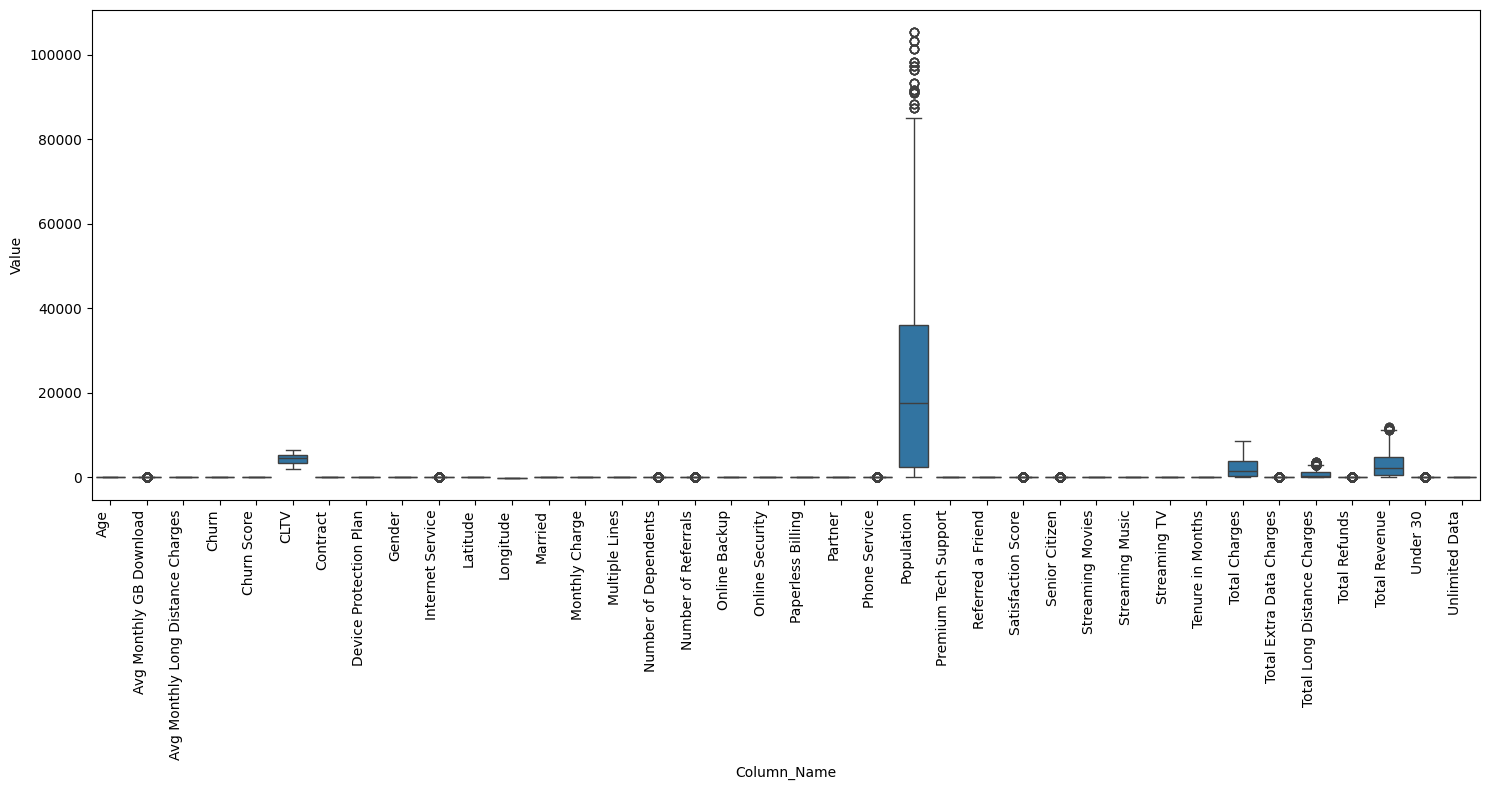

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame
melted_df = finaldf.melt(var_name='Column_Name', value_name='Value')

# Increase figure size and rotate labels
plt.figure(figsize=(15, 8))  # Adjust width and height as needed
sns.boxplot(x='Column_Name', y='Value', data=melted_df)
plt.xticks(rotation=90, ha='right')  # Rotate 90 degrees

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
import numpy as np
result=np.quantile(finaldf['Population'],[.25,.75])
result

array([ 2344., 36125.])

In [ ]:
iqr=np.quantile(finaldf['Population'],.75)-np.quantile(finaldf['Population'],.25)
uperfence=iqr-1.5*np.quantile(finaldf['Population'],.25)
lowerfence=iqr+1.5*np.quantile(finaldf['Population'],.75)
uperfence,lowerfence

updated_finaldf=finaldf[(finaldf['Population'] > 30265.0) & (finaldf['Population'] < 87968.5)]


In [ ]:
# Melt the DataFrame
melted_df = updated_finaldf.melt(var_name='Column_Name', value_name='Value')

# Increase figure size and rotate labels
plt.figure(figsize=(15, 8))  # Adjust width and height as needed
sns.boxplot(x='Column_Name', y='Value', data=melted_df)
plt.xticks(rotation=90, ha='right')  # Rotate 90 degrees

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
updated_finaldf.to_csv('C:/Users/sgoel/IVP/New folder___/ML_model_training_using_MLOPS_dvc_and_dvclive/data/Cleaned_rawfile.csv',index=False, header=True,)